# <b>Lip Region Deepfake Detection</b>

**Project Description**:  
This notebook implements a pipeline for detecting deepfakes by analyzing the lip region in videos. Two deep learning models are employed to distinguish between real and fake videos:
1. **CNN + GRU**: A simple model combining `Convolutional Neural Network (CNN)` and `Gated Recurrent Unit (GRU)` for spatial and temporal feature processing.
2. **ResNet-50 + Transformer**: An advanced model leveraging pre-trained `ResNet-50` and `Transformer` for enhanced feature extraction.
- Additionally, a combination method `Weighted Soft Voting` is applied to optimize prediction performance.

**Data**:  
- **FaceForensics++**: Primary dataset with 400 videos (real and fake) sourced from Kaggle.
- **Deepfake Detection Challenge**: dataset of this competition.

**Date**: February 04, 2025  
**Author**: Nguyễn Công Tuyền  

## 1. Environment Setup and Data Acquisition

**Objective**:  
Install required libraries, download datasets from Kaggle, and prepare tools for lip region extraction.


In [1]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Download Pre-trained Lip Extraction Model**  
Use `shape_predictor_68_face_landmarks.dat` from dlib to detect and extract lip regions from videos.


In [2]:
!wget -O shape_predictor_68_face_landmarks.dat.bz2 https://github.com/nguyencongtuyen11/Dataset-Deepfake-Detection/raw/main/shape_predictor_68_face_landmarks.dat.bz2


--2025-03-05 02:56:45--  https://github.com/nguyencongtuyen11/Dataset-Deepfake-Detection/raw/main/shape_predictor_68_face_landmarks.dat.bz2
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nguyencongtuyen11/Dataset-Deepfake-Detection/main/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-03-05 02:56:45--  https://raw.githubusercontent.com/nguyencongtuyen11/Dataset-Deepfake-Detection/main/shape_predictor_68_face_landmarks.dat.bz2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predict

In [3]:
# Unzip
!bunzip2 shape_predictor_68_face_landmarks.dat.bz2

**Download FaceForensics++ Dataset from Kaggle**

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hungle3401/faceforensics")

print("Path to dataset files:", path)

100%|██████████| 2.73G/2.73G [00:34<00:00, 84.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hungle3401/faceforensics/versions/1


In [5]:
!ls /root/.cache/kagglehub/datasets/hungle3401/faceforensics/versions/1

FF++


In [6]:
!ls -R /root/.cache/kagglehub/datasets/hungle3401/faceforensics/versions/1/FF++

/root/.cache/kagglehub/datasets/hungle3401/faceforensics/versions/1/FF++:
fake  real

/root/.cache/kagglehub/datasets/hungle3401/faceforensics/versions/1/FF++/fake:
01_02__outside_talking_still_laughing__YVGY8LOK.mp4
01_02__walk_down_hall_angry__YVGY8LOK.mp4
01_03__hugging_happy__ISF9SP4G.mp4
01_03__podium_speech_happy__480LQD1C.mp4
01_03__talking_against_wall__JZUXXFRB.mp4
01_11__meeting_serious__9OM3VE0Y.mp4
01_11__secret_conversation__4OJNJLOO.mp4
01_11__talking_against_wall__9229VVZ3.mp4
01_11__walking_outside_cafe_disgusted__FAFWDR4W.mp4
01_12__outside_talking_pan_laughing__TNI7KUZ6.mp4
01_20__outside_talking_pan_laughing__OTGHOG4Z.mp4
01_20__outside_talking_still_laughing__FW94AIMJ.mp4
01_21__walk_down_hall_angry__03X7CELV.mp4
01_27__hugging_happy__ZYCZ30C0.mp4
01_27__outside_talking_still_laughing__ZYCZ30C0.mp4
01_27__walking_outside_cafe_disgusted__ZYCZ30C0.mp4
02_01__secret_conversation__YVGY8LOK.mp4
02_03__walking_down_street_outside_angry__QH3Y0IG0.mp4
02_03__walking_outside

**Download Deepfake Detection Challenge Dataset**

In [7]:
!kaggle competitions download -c deepfake-detection-challenge

100% 4.13G/4.13G [00:55<00:00, 40.7MB/s]
100% 4.13G/4.13G [00:55<00:00, 80.0MB/s]


In [8]:
!unzip deepfake-detection-challenge.zip -d deepfake_data

Archive:  deepfake-detection-challenge.zip
  inflating: deepfake_data/sample_submission.csv  
  inflating: deepfake_data/test_videos/aassnaulhq.mp4  
  inflating: deepfake_data/test_videos/aayfryxljh.mp4  
  inflating: deepfake_data/test_videos/acazlolrpz.mp4  
  inflating: deepfake_data/test_videos/adohdulfwb.mp4  
  inflating: deepfake_data/test_videos/ahjnxtiamx.mp4  
  inflating: deepfake_data/test_videos/ajiyrjfyzp.mp4  
  inflating: deepfake_data/test_videos/aktnlyqpah.mp4  
  inflating: deepfake_data/test_videos/alrtntfxtd.mp4  
  inflating: deepfake_data/test_videos/aomqqjipcp.mp4  
  inflating: deepfake_data/test_videos/apedduehoy.mp4  
  inflating: deepfake_data/test_videos/apvzjkvnwn.mp4  
  inflating: deepfake_data/test_videos/aqrsylrzgi.mp4  
  inflating: deepfake_data/test_videos/axfhbpkdlc.mp4  
  inflating: deepfake_data/test_videos/ayipraspbn.mp4  
  inflating: deepfake_data/test_videos/bcbqxhziqz.mp4  
  inflating: deepfake_data/test_videos/bcvheslzrq.mp4  
  inflatin

**Install Additional Libraries**

In [11]:
!pip install transformers

**Import Required Libraries**

In [31]:

import cv2
import dlib
import numpy as np
import os
import glob
import pandas as pd
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torchvision.models as models
from google.colab.patches import cv2_imshow
import torch.nn.functional as F

**Set Device and Paths**

In [24]:

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATA_FOLDER = "/root/.cache/kagglehub/datasets/hungle3401/faceforensics/versions/1/FF++"
CHECKPOINT_PATH = "lip_data_checkpoint_1.npz"
MAX_FRAMES = 10

In [48]:
# Initialize Lip Region Detector**
predictor_path = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

print("Environment is ready!")


Environment is ready!


## 2. Data Preprocessing

**Objective**:

In [26]:
# Extract lip regions from FaceForensics++ videos and save processed data to a checkpoint for reuse.

def extract_lip_region(video_path, max_frames=MAX_FRAMES):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Cannot open video {os.path.basename(video_path)}")
        return np.zeros((max_frames, 64, 64, 3), dtype=np.uint8)

    frames = []
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    step = max(1, frame_count // max_frames)

    for i in range(0, frame_count, step):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)
        if len(faces) == 0:
            continue

        landmarks = predictor(gray, faces[0])
        lip_points = np.array([[landmarks.part(n).x, landmarks.part(n).y] for n in range(48, 68)])
        x_min, y_min = np.min(lip_points, axis=0)
        x_max, y_max = np.max(lip_points, axis=0)

        lip_region = frame[y_min:y_max, x_min:x_max]
        if lip_region.size == 0:
            continue

        lip_resized = cv2.resize(lip_region, (64, 64), interpolation=cv2.INTER_LINEAR)
        frames.append(lip_resized)

        if len(frames) >= max_frames:
            break

    cap.release()
    if len(frames) == 0:
        return np.zeros((max_frames, 64, 64, 3), dtype=np.uint8)

    while len(frames) < max_frames:
        frames.append(frames[-1])

    return np.array(frames[:max_frames], dtype=np.uint8)

In [27]:
# Preprocess and save to checkpoint
categories = {"real": 1, "fake": 0}
all_lip_frames = []
labels = []

for category, label in categories.items():
    category_path = os.path.join(DATA_FOLDER, category)
    video_files = glob.glob(os.path.join(category_path, "*.mp4"))
    for video_path in video_files:
        lip_frames = extract_lip_region(video_path)
        all_lip_frames.append(lip_frames)
        labels.append(label)
        print(f"Processed {os.path.basename(video_path)}, Shape: {lip_frames.shape}")

all_lip_frames_array = np.stack(all_lip_frames)
np.savez(CHECKPOINT_PATH, lip_frames=all_lip_frames_array, labels=np.array(labels))
print(f"Data saved to {CHECKPOINT_PATH}")

# Load data from checkpoint
if os.path.exists(CHECKPOINT_PATH):
    data = np.load(CHECKPOINT_PATH)
    all_lip_frames = data["lip_frames"]
    labels = data["labels"].tolist()
    print(f"Loaded {len(labels)} videos from checkpoint")
else:
    print("Checkpoint not found!")

Processed 14__talking_angry_couch.mp4, Shape: (10, 64, 64, 3)
Processed 03__outside_talking_pan_laughing.mp4, Shape: (10, 64, 64, 3)
Processed 13__exit_phone_room.mp4, Shape: (10, 64, 64, 3)
Processed 15__talking_angry_couch.mp4, Shape: (10, 64, 64, 3)
Processed 09__talking_against_wall.mp4, Shape: (10, 64, 64, 3)
Processed 09__outside_talking_pan_laughing.mp4, Shape: (10, 64, 64, 3)
Processed 10__kitchen_still.mp4, Shape: (10, 64, 64, 3)
Processed 11__secret_conversation.mp4, Shape: (10, 64, 64, 3)
Processed 12__walk_down_hall_angry.mp4, Shape: (10, 64, 64, 3)
Processed 05__kitchen_pan.mp4, Shape: (10, 64, 64, 3)
Processed 03__secret_conversation.mp4, Shape: (10, 64, 64, 3)
Processed 08__outside_talking_pan_laughing.mp4, Shape: (10, 64, 64, 3)
Processed 08__talking_against_wall.mp4, Shape: (10, 64, 64, 3)
Processed 12__walking_down_street_outside_angry.mp4, Shape: (10, 64, 64, 3)
Processed 03__talking_angry_couch.mp4, Shape: (10, 64, 64, 3)
Processed 04__podium_speech_happy.mp4, Shape

## 3. Data Analysis

**Objective**:  

Total number of videos: 400
Shape of each sample: (10, 64, 64, 3)
Total data shape: (400, 10, 64, 64, 3)
Number of Real videos: 200
Number of Fake videos: 200


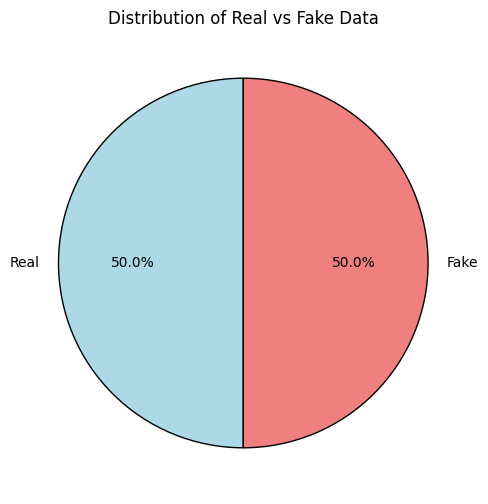

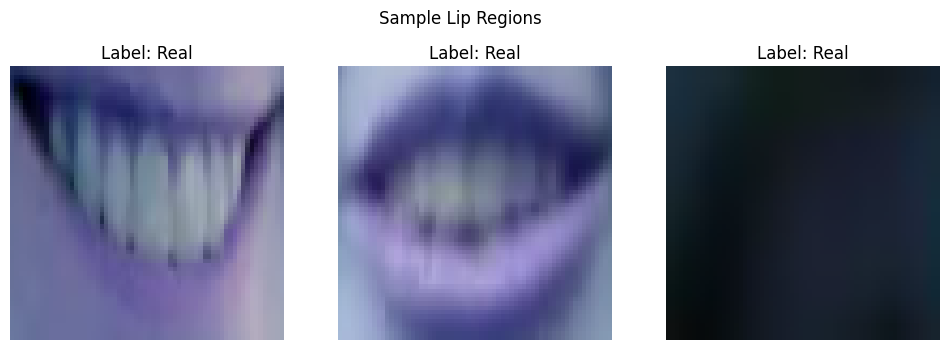

In [49]:
# Analyze the number of videos, data dimensions, label distribution, and visualize sample lip regions.

# Check video count and dimensions
num_videos = len(labels)
print(f"Total number of videos: {num_videos}")
print(f"Shape of each sample: {all_lip_frames[0].shape}")
print(f"Total data shape: {all_lip_frames.shape}")

# Count real and fake videos
unique, counts = np.unique(labels, return_counts=True)
label_counts = dict(zip(unique, counts))
print(f"Number of Real videos: {label_counts[1]}")
print(f"Number of Fake videos: {label_counts[0]}")

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    label_counts.values(),
    labels=["Real", "Fake"],
    autopct="%1.1f%%",
    colors=["lightblue", "lightcoral"],
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Distribution of Real vs Fake Data")
plt.show()

# Display sample lip regions
num_samples = 3
plt.figure(figsize=(12, 4))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(all_lip_frames[i][0])  # Show the first frame of each video
    plt.title(f"Label: {'Real' if labels[i] == 1 else 'Fake'}")
    plt.axis('off')
plt.suptitle("Sample Lip Regions")
plt.show()


## 4. Data Augmentation

**Objective**:

In [50]:
# Apply data augmentation techniques to improve model generalization.

def augment_lip_frames(lip_frames):
    lip_tensor = torch.tensor(lip_frames, dtype=torch.float32).permute(0, 3, 1, 2)


    if torch.rand(1) > 0.5:
        lip_tensor = torch.flip(lip_tensor, dims=[3])
        print("Applied horizontal flip")

    if torch.rand(1) > 0.5:
        start_x = torch.randint(0, 8, (1,)).item()
        start_y = torch.randint(0, 8, (1,)).item()
        lip_tensor = lip_tensor[:, :, start_y:start_y+56, start_x:start_x+56]
        lip_tensor = F.interpolate(lip_tensor, size=(64, 64), mode='bilinear', align_corners=False)
        print(f"Applied random crop at ({start_x}, {start_y})")

    if torch.rand(1) > 0.5:
        brightness_factor = torch.rand(1).item() * 0.4 + 0.8
        lip_tensor = lip_tensor * brightness_factor
        lip_tensor = torch.clamp(lip_tensor, 0, 255)
        print(f"Applied brightness adjustment: {brightness_factor:.2f}")

    if torch.rand(1) > 0.5:
        noise = torch.randn_like(lip_tensor) * 0.15
        lip_tensor = lip_tensor + noise
        lip_tensor = torch.clamp(lip_tensor, 0, 255)
        print("Applied noise")

    return lip_tensor

class LipFrameDataset(Dataset):
    def __init__(self, lip_frames, labels):
        self.lip_frames = lip_frames
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        lip_tensor = augment_lip_frames(self.lip_frames[idx])
        return lip_tensor, torch.tensor(self.labels[idx], dtype=torch.long)

# Split data and create dataloaders
train_val_frames, test_frames, train_val_labels, test_labels = train_test_split(
    all_lip_frames, labels, test_size=0.2, random_state=42
)
train_frames, val_frames, train_labels, val_labels = train_test_split(
    train_val_frames, train_val_labels, test_size=0.25, random_state=42
)

train_dataset = LipFrameDataset(train_frames, train_labels)
val_dataset = LipFrameDataset(val_frames, val_labels)
test_dataset = LipFrameDataset(test_frames, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

sample_lip, sample_label = train_dataset[0]
print(f"Shape of augmented sample: {sample_lip.shape}")

Number of training samples: 240
Number of validation samples: 80
Number of test samples: 80
Applied brightness adjustment: 0.91
Shape of augmented sample: torch.Size([10, 3, 64, 64])


## 5. Training CNN + GRU Model

**Objective**:  
Build and train a CNN + GRU model for deepfake detection based on lip regions.


In [33]:

def create_cnn_gru_model(max_frames=MAX_FRAMES):
    cnn = nn.Sequential(
        nn.Conv2d(3, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Conv2d(128, 256, 3, padding=1), nn.BatchNorm2d(256), nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Conv2d(256, 512, 3, padding=1), nn.BatchNorm2d(512), nn.ReLU(),
        nn.MaxPool2d(2)
    )
    gru = nn.GRU(512 * 4 * 4, 256, num_layers=2, batch_first=True, dropout=0.3)
    dropout = nn.Dropout(0.5)
    fc = nn.Linear(256, 2)

    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.cnn = cnn
            self.gru = gru
            self.dropout = dropout
            self.fc = fc

        def forward(self, x):
            batch_size = x.size(0)
            cnn_out = self.cnn(x.contiguous().view(-1, 3, 64, 64)).view(batch_size, max_frames, -1)
            gru_out, _ = self.gru(cnn_out)
            gru_out = gru_out[:, -1, :]
            gru_out = self.dropout(gru_out)
            return self.fc(gru_out)

    model = Model().to(DEVICE)
    return model

cnn_gru_model = create_cnn_gru_model()
print("Cấu trúc mô hình CNN + GRU:")
print(cnn_gru_model)


optimizer = torch.optim.Adam(cnn_gru_model.parameters(), lr=0.0002)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
checkpoint_path = f"cnn_gru_{MAX_FRAMES}_frames.pth"

best_accuracy = 0
for epoch in range(40):
    cnn_gru_model.train()
    total_loss = 0
    for lip_frames, lbls in train_loader:
        lip_frames, lbls = lip_frames.to(DEVICE), lbls.to(DEVICE)
        optimizer.zero_grad()
        outputs = cnn_gru_model(lip_frames)
        loss = criterion(outputs, lbls)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)

    cnn_gru_model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for lip_frames, lbls in val_loader:
            lip_frames, lbls = lip_frames.to(DEVICE), lbls.to(DEVICE)
            outputs = cnn_gru_model(lip_frames)
            _, predicted = torch.max(outputs.data, 1)
            total += lbls.size(0)
            correct += (predicted == lbls).sum().item()
    accuracy = 100 * correct / total

    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Val Accuracy: {accuracy:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        torch.save(cnn_gru_model.state_dict(), checkpoint_path)
        print(f"Saved best model at epoch {epoch+1}")

    scheduler.step(avg_loss)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Applied random crop at (3, 1)
Applied brightness adjustment: 1.09
Applied noise
Applied brightness adjustment: 0.88
Applied noise
Applied horizontal flip
Applied random crop at (1, 5)
Applied random crop at (4, 2)
Applied random crop at (0, 7)
Applied brightness adjustment: 1.19
Applied horizontal flip
Applied random crop at (7, 4)
Applied brightness adjustment: 0.84
Applied noise
Applied random crop at (3, 7)
Applied brightness adjustment: 1.03
Applied horizontal flip
Applied random crop at (3, 0)
Applied noise
Applied horizontal flip
Applied random crop at (6, 1)
Applied brightness adjustment: 1.18
Applied horizontal flip
Applied random crop at (0, 6)
Applied brightness adjustment: 0.95
Applied noise
Applied horizontal flip
Applied random crop at (5, 4)
Applied horizontal flip
Applied noise
Applied random crop at (6, 0)
Applied noise
Applied horizontal flip
Applied random crop at (0, 4)
Applied brightness adjustment: 0.84
Appli

## 6. Training ResNet + Transformer Model

**Objective**:  
Build and train a ResNet-50 + Transformer model, leveraging pre-trained weights for improved performance.


In [34]:

def create_resnet_transformer_model(max_frames=MAX_FRAMES):
    resnet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
    resnet.fc = nn.Identity()
    for param in resnet.parameters():
        param.requires_grad = False
    for param in resnet.layer4.parameters():
        param.requires_grad = True

    pos_embedding = nn.Parameter(torch.randn(1, max_frames, 2048))
    encoder_layer = nn.TransformerEncoderLayer(d_model=2048, nhead=8, dropout=0.4, batch_first=True)
    transformer = nn.TransformerEncoder(encoder_layer, num_layers=1)
    dropout = nn.Dropout(0.6)
    fc = nn.Linear(2048, 2)

    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.resnet = resnet
            self.pos_embedding = pos_embedding
            self.transformer = transformer
            self.dropout = dropout
            self.fc = fc

        def forward(self, x):
            batch_size, num_frames, C, H, W = x.size()
            frames_flat = x.view(-1, C, H, W)
            resnet_out = self.resnet(frames_flat)
            resnet_out = resnet_out.view(batch_size, num_frames, -1)
            resnet_out = resnet_out + self.pos_embedding
            transformer_out = self.transformer(resnet_out)
            transformer_out = transformer_out[:, -1, :]
            transformer_out = self.dropout(transformer_out)
            return self.fc(transformer_out)

    model = Model().to(DEVICE)
    return model


resnet_transformer_model = create_resnet_transformer_model()
print("Cấu trúc mô hình ResNet + Transformer:")
print(resnet_transformer_model)

# Training model
optimizer = torch.optim.Adam(resnet_transformer_model.parameters(), lr=0.00005, weight_decay=1e-3)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)
checkpoint_path = f"resnet_transformer_{MAX_FRAMES}_frames.pth"

best_accuracy = 0
for epoch in range(40):
    resnet_transformer_model.train()
    total_loss = 0
    for lip_frames, lbls in train_loader:
        lip_frames, lbls = lip_frames.to(DEVICE), lbls.to(DEVICE)
        optimizer.zero_grad()
        outputs = resnet_transformer_model(lip_frames)
        loss = criterion(outputs, lbls)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)

    resnet_transformer_model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for lip_frames, lbls in val_loader:
            lip_frames, lbls = lip_frames.to(DEVICE), lbls.to(DEVICE)
            outputs = resnet_transformer_model(lip_frames)
            _, predicted = torch.max(outputs.data, 1)
            total += lbls.size(0)
            correct += (predicted == lbls).sum().item()
    accuracy = 100 * correct / total

    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Val Accuracy: {accuracy:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        torch.save(resnet_transformer_model.state_dict(), checkpoint_path)
        print(f"Saved best model at epoch {epoch+1}")

    scheduler.step()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 114MB/s]


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Applied noise
Applied random crop at (3, 2)
Applied brightness adjustment: 0.85
Applied horizontal flip
Applied random crop at (2, 5)
Applied brightness adjustment: 0.89
Applied horizontal flip
Applied random crop at (6, 0)
Applied noise
Applied random crop at (7, 1)
Applied noise
Applied random crop at (5, 1)
Applied noise
Applied random crop at (2, 4)
Applied noise
Applied random crop at (3, 7)
Applied brightness adjustment: 0.92
Applied brightness adjustment: 0.81
Applied random crop at (0, 5)
Applied brightness adjustment: 1.02
Applied random crop at (1, 3)
Applied brightness adjustment: 0.85
Applied noise
Applied horizontal flip
Applied horizontal flip
Applied brightness adjustment: 0.84
Applied noise
Applied random crop at (0, 2)
Applied brightness adjustment: 0.90
Applied noise
Applied random crop at (7, 0)
Applied brightness adjustment: 1.01
Applied noise
Applied horizontal flip
Applied brightness adjustment: 0.87
Applied

## 7. Model Evaluation

**Objective**:  
Evaluate the performance of both models on the test set using Confusion Matrix and metrics (Accuracy, Precision, Recall, F1 Score).


<ipython-input-51-8a1be439789c>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path))


Loaded CNN + GRU from cnn_gru_10_frames.pth
Applied horizontal flip
Applied random crop at (6, 6)
Applied horizontal flip
Applied random crop at (4, 4)
Applied noise
Applied noise
Applied random crop at (2, 2)
Applied brightness adjustment: 0.82
Applied random crop at (0, 2)
Applied horizontal flip
Applied random crop at (3, 5)
Applied brightness adjustment: 0.91
Applied horizontal flip
Applied random crop at (2, 3)
Applied brightness adjustment: 1.03
Applied noise
Applied horizontal flip
Applied random crop at (7, 7)
Applied noise
Applied random crop at (0, 1)
Applied brightness adjustment: 1.19
Applied noise
Applied random crop at (5, 3)
Applied noise
Applied random crop at (2, 3)
Applied random crop at (6, 5)
Applied brightness adjustment: 0.86
Applied noise
Applied random crop at (4, 1)
Applied horizontal flip
Applied random crop at (5, 3)
Applied noise
Applied random crop at (5, 0)
Applied brightness adjustment: 1.11
Applied noise
Applied horizontal flip
Applied random crop at (6,

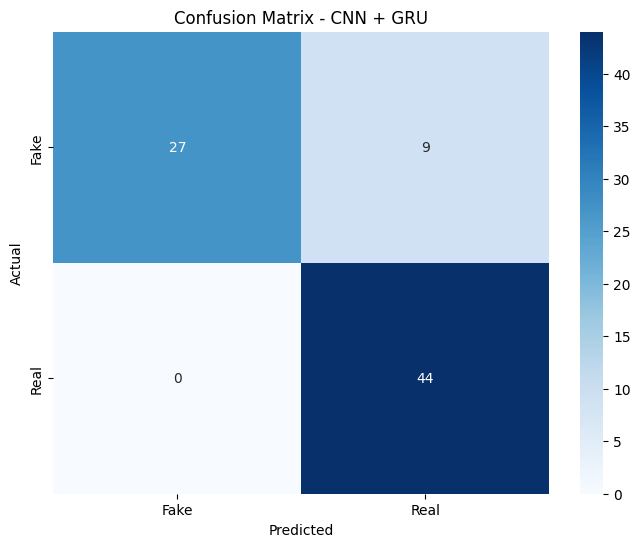


CNN + GRU Metrics:
Accuracy: 88.75%
Precision: 0.8302
Recall: 1.0000
F1 Score: 0.9072


<ipython-input-51-8a1be439789c>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path))


Loaded ResNet + Transformer from resnet_transformer_10_frames.pth
Applied horizontal flip
Applied random crop at (1, 7)
Applied random crop at (0, 2)
Applied horizontal flip
Applied brightness adjustment: 1.01
Applied noise
Applied brightness adjustment: 1.11
Applied noise
Applied random crop at (7, 3)
Applied brightness adjustment: 0.97
Applied noise
Applied horizontal flip
Applied brightness adjustment: 0.90
Applied horizontal flip
Applied random crop at (7, 3)
Applied brightness adjustment: 1.04
Applied noise
Applied horizontal flip
Applied brightness adjustment: 1.16
Applied horizontal flip
Applied random crop at (5, 7)
Applied noise
Applied horizontal flip
Applied brightness adjustment: 1.11
Applied horizontal flip
Applied brightness adjustment: 0.84
Applied noise
Applied horizontal flip
Applied brightness adjustment: 1.11
Applied noise
Applied brightness adjustment: 0.97
Applied noise
Applied horizontal flip
Applied horizontal flip
Applied random crop at (0, 0)
Applied brightness

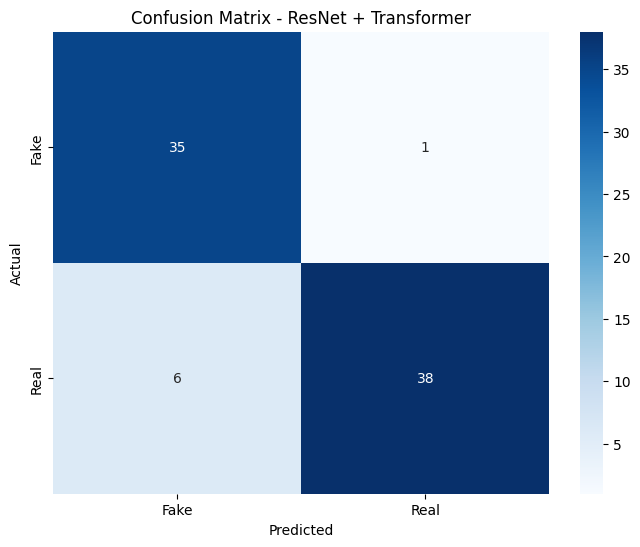


ResNet + Transformer Metrics:
Accuracy: 91.25%
Precision: 0.9744
Recall: 0.8636
F1 Score: 0.9157


In [51]:

def evaluate_model(model, test_loader, checkpoint_path, model_name):
    if os.path.exists(checkpoint_path):
        model.load_state_dict(torch.load(checkpoint_path))
        print(f"Loaded {model_name} from {checkpoint_path}")
    else:
        print(f"Checkpoint {checkpoint_path} not found!")
        return

    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for lip_frames, lbls in test_loader:
            lip_frames, lbls = lip_frames.to(DEVICE), lbls.to(DEVICE)
            outputs = model(lip_frames)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(lbls.cpu().numpy())

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn) * 100 if (tp + tn + fp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")

# Evaluate 2 model
evaluate_model(cnn_gru_model, test_loader, f"cnn_gru_{MAX_FRAMES}_frames.pth", "CNN + GRU")
evaluate_model(resnet_transformer_model, test_loader, f"resnet_transformer_{MAX_FRAMES}_frames.pth", "ResNet + Transformer")

## 8. Visualization of Predictions on Videos

**Objective**:  
Visualize predictions from all three models (CNN + GRU, ResNet + Transformer) on 5 random videosvideos.


CNN + GRU:
CNN + GRU - Sample 1: Predicted Real, True Real


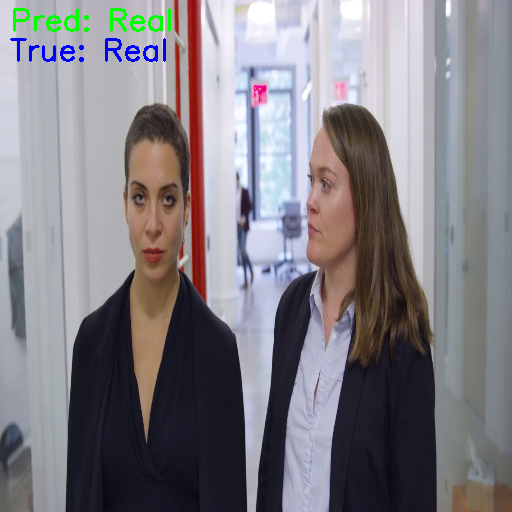

CNN + GRU - Sample 2: Predicted Real, True Real


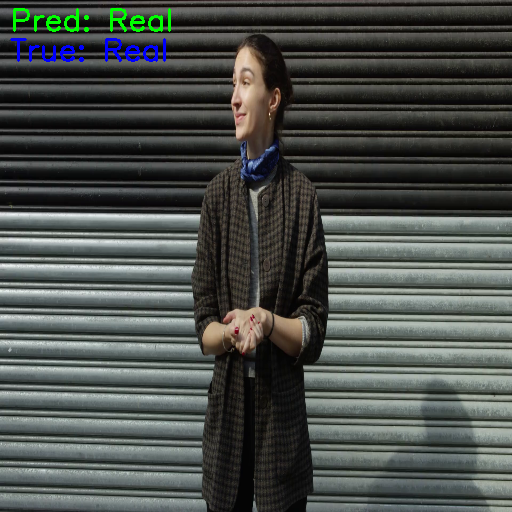

CNN + GRU - Sample 3: Predicted Fake, True Fake


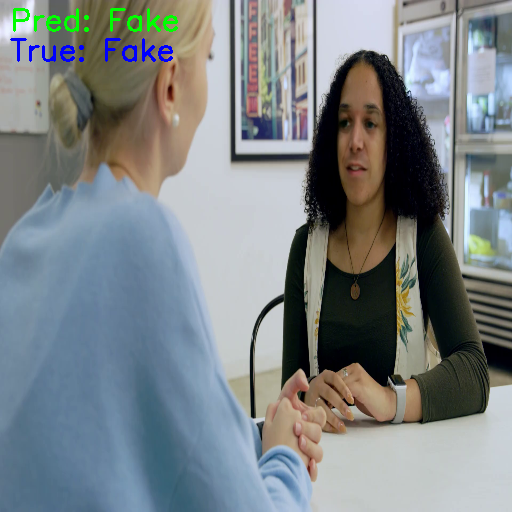

CNN + GRU - Sample 4: Predicted Real, True Fake


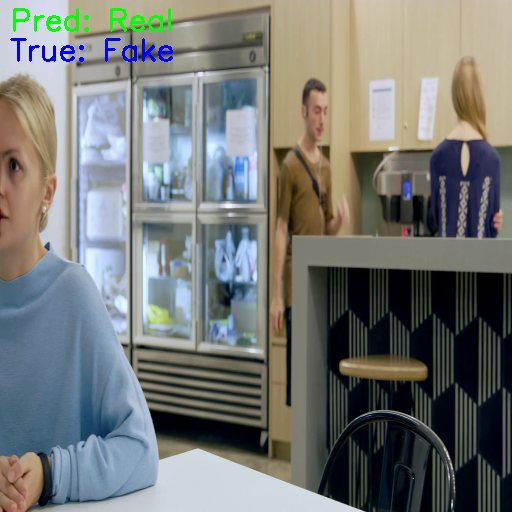

CNN + GRU - Sample 5: Predicted Real, True Real


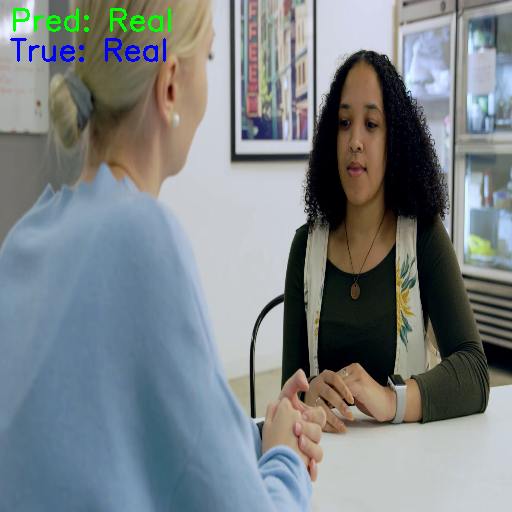


ResNet + Transformer:
ResNet + Transformer - Sample 1: Predicted Real, True Real


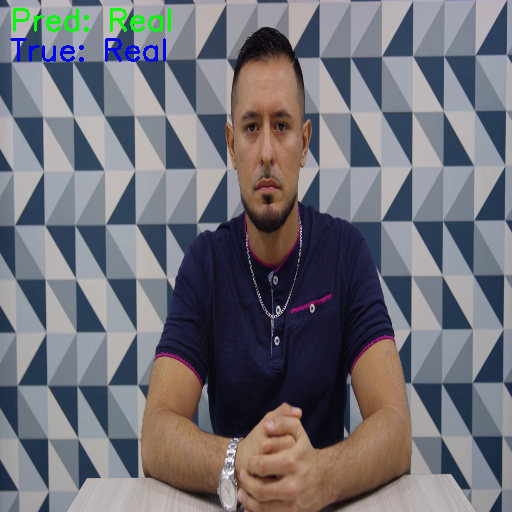

ResNet + Transformer - Sample 2: Predicted Real, True Real


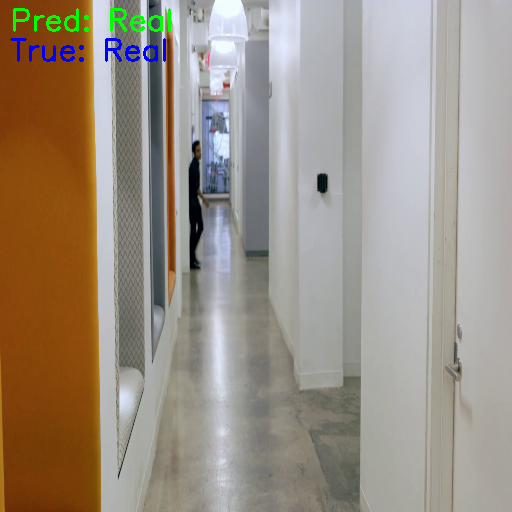

ResNet + Transformer - Sample 3: Predicted Real, True Real


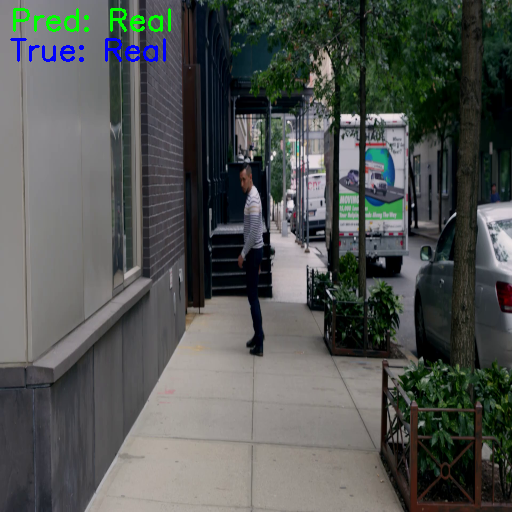

ResNet + Transformer - Sample 4: Predicted Fake, True Fake


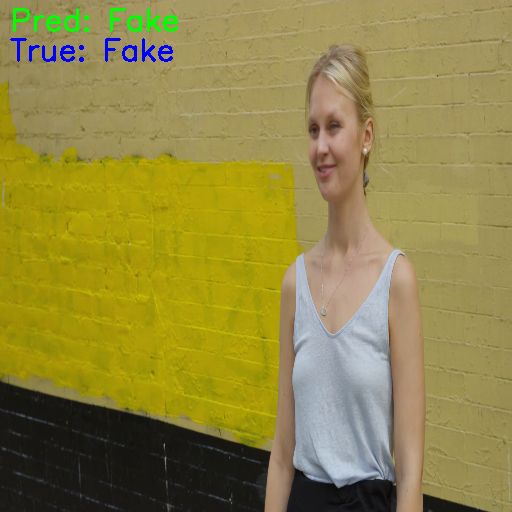

ResNet + Transformer - Sample 5: Predicted Fake, True Fake


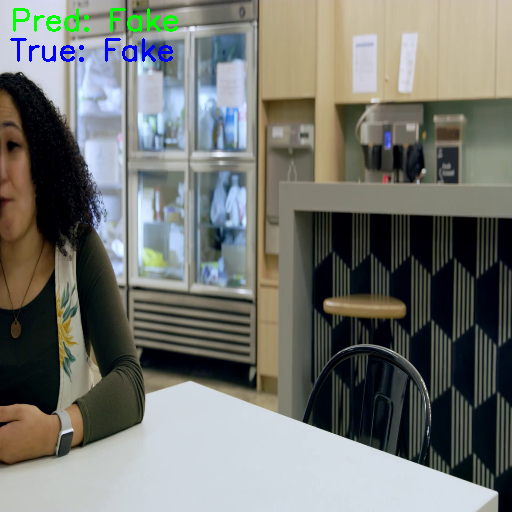

In [53]:

def display_video_results(model, model_name):
    all_video_files = []
    all_labels = []
    categories = {"real": 1, "fake": 0}
    for category, label in categories.items():
        category_path = os.path.join(DATA_FOLDER, category)
        video_files = glob.glob(os.path.join(category_path, "*.mp4"))
        all_video_files.extend(video_files)
        all_labels.extend([label] * len(video_files))

    num_samples = 5
    random_indices = np.random.choice(len(all_video_files), num_samples, replace=False)
    selected_video_paths = [all_video_files[i] for i in random_indices]
    selected_labels = [all_labels[i] for i in random_indices]

    model.eval()
    with torch.no_grad():
        for i, video_path in enumerate(selected_video_paths):
            lip_frames = extract_lip_region(video_path)
            lip_tensor = torch.tensor(lip_frames, dtype=torch.float32).permute(0, 3, 1, 2).unsqueeze(0).to(DEVICE)
            outputs = model(lip_tensor)
            _, predicted = torch.max(outputs.data, 1)
            pred_label = "Real" if predicted.item() == 1 else "Fake"
            true_label = "Real" if selected_labels[i] == 1 else "Fake"

            cap = cv2.VideoCapture(video_path)
            ret, frame = cap.read()
            if ret:
                frame_large = cv2.resize(frame, (512, 512), interpolation=cv2.INTER_LINEAR)
                cv2.putText(frame_large, f"Pred: {pred_label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                cv2.putText(frame_large, f"True: {true_label}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
                print(f"{model_name} - Sample {i+1}: Predicted {pred_label}, True {true_label}")
                cv2_imshow(frame_large)
            else:
                print(f"Cannot read frame from {os.path.basename(video_path)}")
            cap.release()


print("CNN + GRU:")
display_video_results(cnn_gru_model, "CNN + GRU")
print("\nResNet + Transformer:")
display_video_results(resnet_transformer_model, "ResNet + Transformer")



## 9. Prediction on Uploaded Video

**Objective**:  
Allow users to upload a video from their computer and predict its label ("Real" or "Fake") using **2** models.


Up Video here (.mp4):


Saving fake.mp4 to fake (1).mp4

nPredict for video: fake (1).mp4
CNN + GRU: Predicted Real
ResNet + Transformer: Predicted Fake


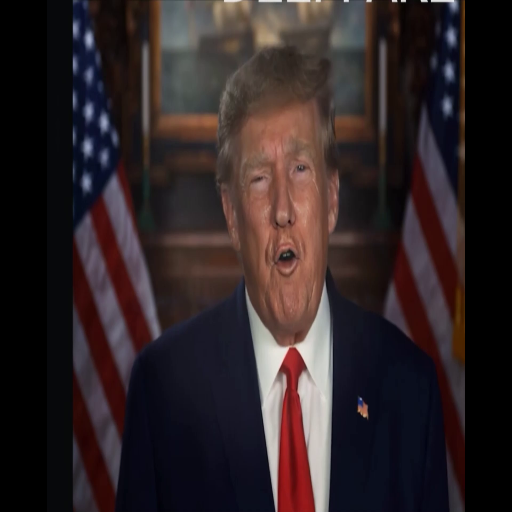

In [54]:

from google.colab import files

print("Up Video here (.mp4):")
uploaded = files.upload()

# take link video
video_path = list(uploaded.keys())[0]


lip_frames = extract_lip_region(video_path)
lip_tensor = torch.tensor(lip_frames, dtype=torch.float32).permute(0, 3, 1, 2).unsqueeze(0).to(DEVICE)


cnn_gru_model.eval()
resnet_transformer_model.eval()

with torch.no_grad():
    # CNN + GRU
    cnn_outputs = cnn_gru_model(lip_tensor)
    _, cnn_pred = torch.max(cnn_outputs, 1)
    cnn_label = "Real" if cnn_pred.item() == 1 else "Fake"

    # ResNet + Transformer
    resnet_outputs = resnet_transformer_model(lip_tensor)
    _, resnet_pred = torch.max(resnet_outputs, 1)
    resnet_label = "Real" if resnet_pred.item() == 1 else "Fake"



cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
if ret:
    frame_large = cv2.resize(frame, (512, 512), interpolation=cv2.INTER_LINEAR)
    print(f"\nnPredict for video: {video_path}")
    print(f"CNN + GRU: Predicted {cnn_label}")
    print(f"ResNet + Transformer: Predicted {resnet_label}")

    cv2_imshow(frame_large)
else:
    print(f"Cannot read frame from {video_path}")
cap.release()